In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# load the tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


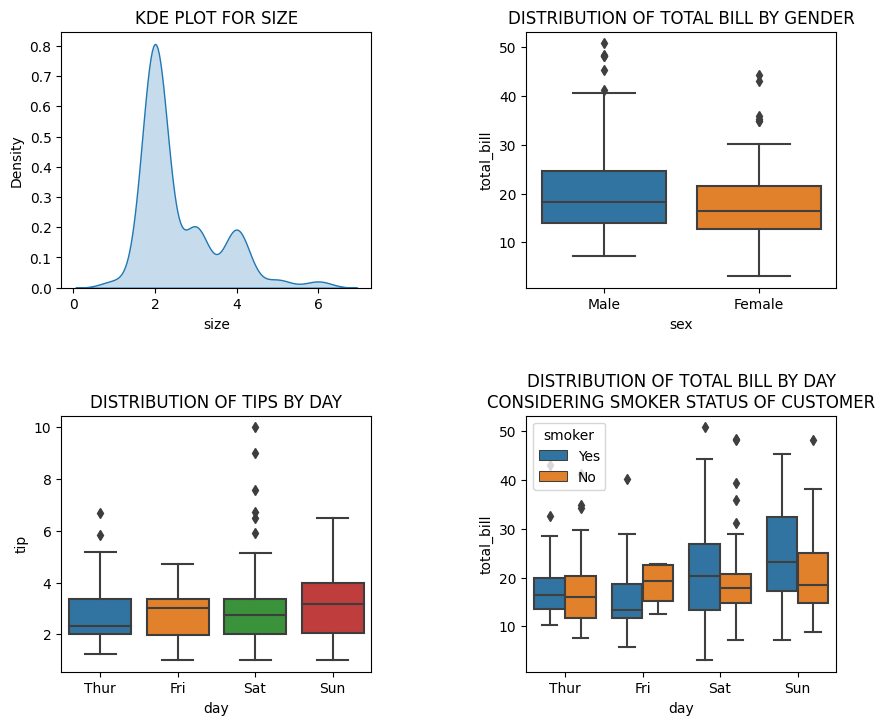

In [4]:
plt.figure(figsize=(10,8))

#Generate a KDE plot for the size feature of the tips dataset. Give detailed explanations of your observations
plt.subplot(2,2,1)
sns.kdeplot(tips['size'], shade=True)
plt.title('KDE plot for size'.upper())

#Using the boxplots, generate the distribution of total bill by gender for the tips dataset. Give detailed explanations of your observations
plt.subplot(2,2,2)
sns.boxplot(data=tips, x='sex', y='total_bill')
plt.title('distribution of total bill by gender'.upper())

#Using boxplots generate the distribution of tips by days.
plt.subplot(2,2,3)
sns.boxplot(data=tips, x='day', y='tip')
plt.title('distribution of tips by day'.upper())

#Using boxplots generate the distribution of total bill by days considering smoker status of the customer.
plt.subplot(2,2,4)
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')
plt.title('distribution of total bill by day\nconsidering smoker status of customer'.upper())

plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)
plt.show()

OBSERVATIONS

Subplot 1: The mode of the KDE plot for size is 2. Also, it is multi-modal at size 3, 4 & 6. And it's skewness is to the right.

Subplot 2: The box plot shows the the distribution of total bill by gender. Male has larger and higher amount of inter-quarter range. They both have same number  of outliers(4), but the male upper outliers are more extreme. Therefore, male pay more bills than female in total.

Subplot 3: Distribution of tips by day. Sunday has the largest inter-quarter range. Only Thursday and Saturday has outliers, but Saturday has the highest number and more extreme upper outliers.

Subplot 4: The distributon of total bill by day considering customers' smoking status is not consistent jugding by smoking status. Therefore, smoking status is not a major factor in the general data. Meanwhile, smokers patronizes more on saturday and sunday.

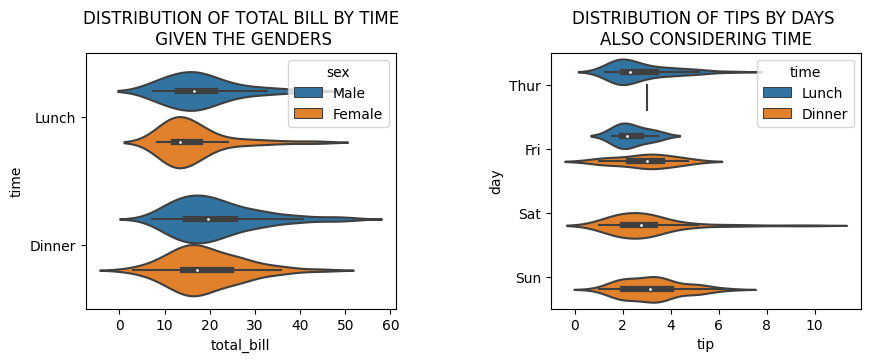

In [5]:
plt.figure(figsize=(10,8))

#Using violin plots generate the distribution of total bill by time given the genders.
plt.subplot(2,2,1)
sns.violinplot(data=tips, y=tips['time'], x=tips['total_bill'], hue='sex', orient='horizontal')
plt.title('distribution of total bill by time\n given the genders'.upper())

#Using violin plots generate the distribution of tips by days also considering time.
plt.subplot(2,2,2)
sns.violinplot(data=tips, y=tips['day'], x=tips['tip'], hue='time', orient='horizontal')
plt.title('distribution of tips by days \nalso considering time'.upper())

plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)
plt.show()


OBSERVATIONS

Subplot 1: Violin plot of total bill by time given gender; shows that there is more patronage during dinner. Also, there is slight difference between the two genders; the male plot during dinner has more upper outliers, while the female plot for lunch is more peaked than the male plot at lunch.

Subplot 2: Distribution of tips by days considering time; most of the tipping happens during dinner, except on thurday where virtually all the tips are during lunch.

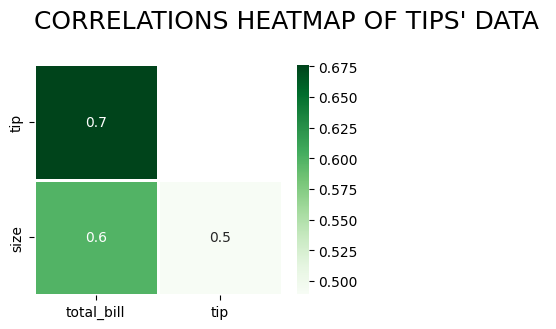

In [8]:
#Plot and customize a correlations heatmap for the tips dataset.
corr = tips.corr()

# use numpy function to mask the data to create a matrix of booleans
ones = np.ones_like(corr, dtype='bool') # by default returns ones for all the data
# use another numpy function to get just the upper triangle of the boolean array
mask = np.triu(ones)

# adjust mask and correlations 
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# generate customized heatmap of correlations
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='Greens', linewidths=.9, cbar_kws={'shrink':.99})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap of tips' data \n".upper(), fontdict={'fontsize': 18}, loc='left')
plt.show()